In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path = '/content/HR_comma_sep.csv'
df = pd.read_csv(path)


In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

In [ ]:
#Now do some exploratory data analysis to figure out which variables have direct and clear impact
#on employee retention  (i.e. whether they leave the company or continue to work)

left = df[df.left==1]

retained = df[df.left==0]

df.groupby('left').mean()

<ipython-input-41-7b13a970a206>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


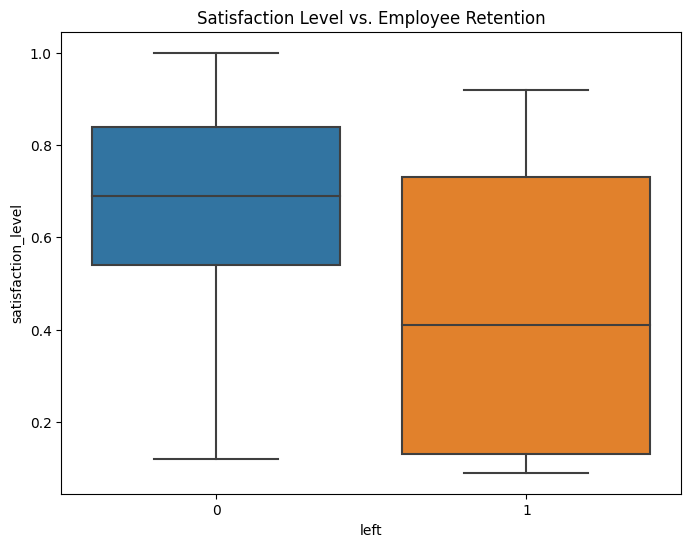

In [ ]:
# Box plot for satisfaction_level
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs. Employee Retention')
plt.show()

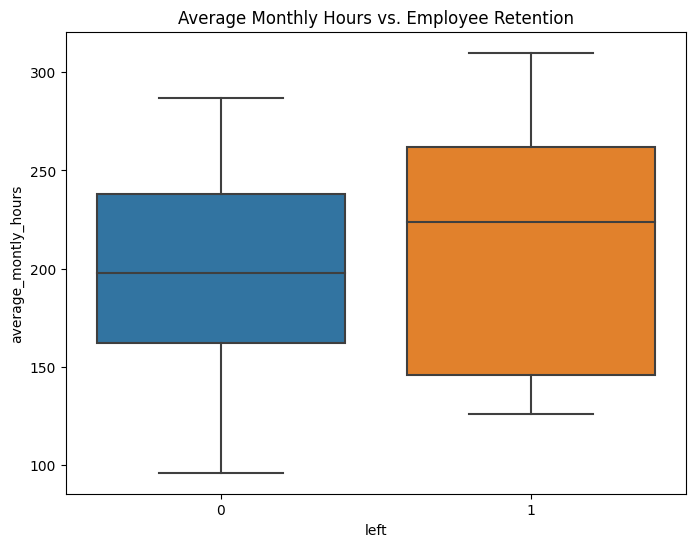

In [ ]:

# Box plot for average_montly_hours
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours vs. Employee Retention')
plt.show()

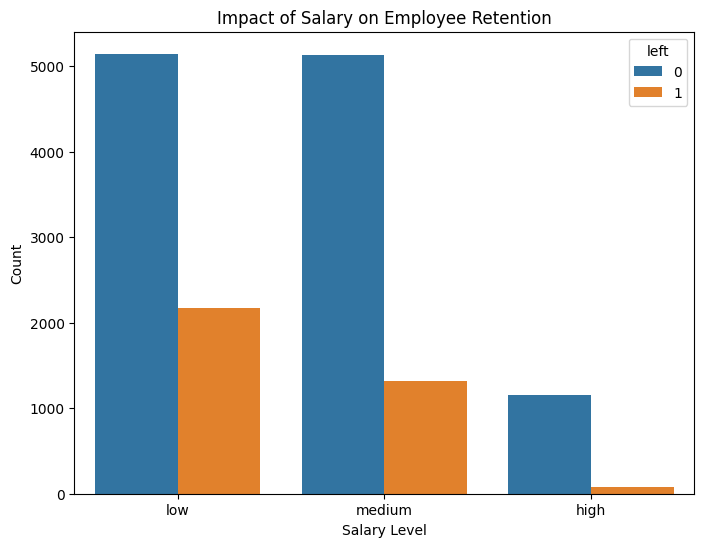

In [ ]:
#Plot bar charts showing impact of employee salaries on retention
# Bar plot for salary vs. retention
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

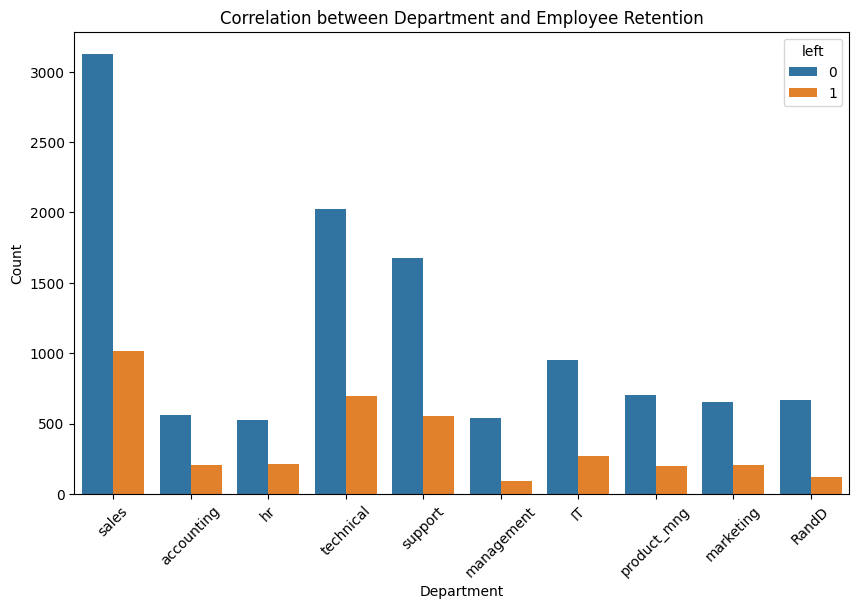

In [ ]:
#Plot bar charts showing corelation between department and employee retention

# Bar plot for department vs. retention
plt.figure(figsize=(10, 6))
sns.countplot(x='sales', hue='left', data=df)
plt.title('Correlation between Department and Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate department names for better visibility
plt.show()

In [ ]:
#Now build logistic regression model using variables that were narrowed down in step 1

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Feature selection
features = ['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary']
X = df[features]
y = df['left']

# Data preprocessing
X_encoded = pd.get_dummies(X, columns=['salary'], drop_first=True)  # One-hot encoding for 'salary'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
#5. Measure the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)